In [1]:
%pylab inline
import os
import pandas as pd

POPS = [   "ACB", "ASW", "ESN", "GWD", "LWK", "MSL", "YRI", \
           "CLM", "MXL", "PEL", "PUR", \
           "CDX", "CHB", "CHS", "JPT", "KHV", \
           "CEU", "FIN", "GBR", "IBS", "TSI", \
           "BEB", "GIH", "ITU", "PJL", "STU"]

# Load config information
#OUTDIR = os.environ["KGOUTDIR"]
OUTDIR="/storage/nicholema/callset_qc_outs/afreq_step"

Populating the interactive namespace from numpy and matplotlib


In [2]:
popcolors = {}
popcolors["AFR"] = "red"
popcolors["AMR"] = "purple"
popcolors["EAS"] = "blue"
popcolors["EUR"] = "green"
popcolors["SAS"] = "orange"

def get_motif(al):
    for m_len in range(1, int(len(al)/2) + 1):
        if len(al) % m_len != 0:
            continue
        motif = al[0:m_len]
        if al == motif * int(len(al) / m_len):
            return motif
    raise ValueError('Could not find motif!')

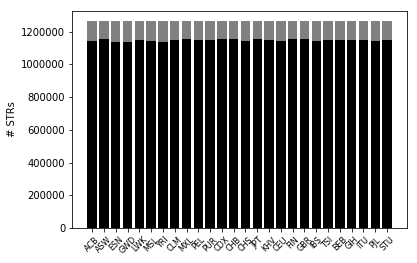

In [143]:
# Num calls by pop

numcalls = []
numpass = []
for pop in POPS:
    fname = os.path.join(OUTDIR, pop, "%s.stats.txt"%pop)
    nc = 0
    npa = 0
    if os.path.exists(fname):
        nc, npa = [int(item.strip()) for item in open(fname, "r").readlines()]
    numcalls.append(nc)
    numpass.append(npa)

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_yscale("log")
ax.bar(range(len(POPS)), numcalls, color="gray")
ax.bar(range(len(POPS)), numpass, color="black");
ax.set_xlabel("")
ax.set_xticks(range(len(POPS)))
ax.set_xticklabels(POPS, rotation=45, size=8)
ax.set_ylabel("# STRs");

,period,numtrios,num_consistent,num_inf_consistent,num_inconsistent,mi_all,mi_inf
0,1,247821736,241248833,148877585,6572903,0.973477,0.957717
1,2,88559027,85398443,37984253,3160584,0.964311,0.923184
2,3,78401249,77999988,6776094,401261,0.994882,0.944093
3,4,199269224,198276937,16757153,992287,0.995020,0.944095
4,5,54256959,53988499,4121548,268460,0.995052,0.938847
5,6,14129824,14068171,934447,61653,0.995637,0.938106


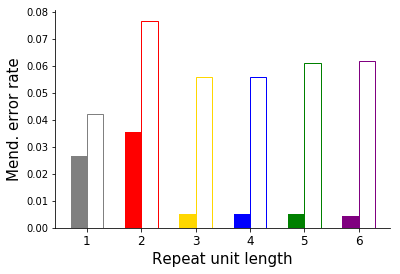

In [144]:
# MI by period combined

import pandas as pd
mend = pd.read_csv(os.path.join(OUTDIR, "mend.txt"), sep="\t")

PERCOLORS = ["gray","red","gold","blue","green","purple"]
w=0.3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(mend.shape[0]), 1-mend["mi_all"], color=PERCOLORS, width=w)
ax.bar([item+w for item in range(mend.shape[0])], 1-mend["mi_inf"], color="white", edgecolor=PERCOLORS, width=w)
ax.set_xticks([item+w/2 for item in range(mend.shape[0])])
ax.set_xticklabels(range(1, 7), size=12)
ax.set_ylabel("Mend. error rate", size=15)
ax.set_xlabel("Repeat unit length", size=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
mend

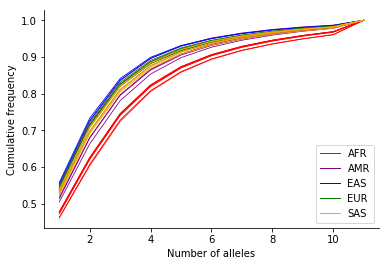

In [14]:
# Num common alleles by pop

import seaborn as sns
MAXNUMALLELES=10

countmatrix = np.zeros(((len(POPS)), MAXNUMALLELES+1))

cumsums = []

for pop in POPS:
    fname = os.path.join(OUTDIR, pop, "%s.alleles.txt"%pop)
    if os.path.exists(fname):
        data = pd.read_csv(fname, sep="\t", names=["numalleles","count"])
        data = data[(data["numalleles"]>=1) ]
        data["freq"] = data["count"]/np.sum(data["count"])
        freqs = list(data[data["numalleles"]<=MAXNUMALLELES]["freq"])
        freqs.append(np.sum(data[data["numalleles"]>MAXNUMALLELES]["freq"]))
        countmatrix[POPS.index(pop)] = freqs
        cumsum = np.cumsum(freqs)
        cumsums.append(cumsum)
    else:
        cumsums.append([0]*(MAXNUMALLELES+1))


for pop in ["ACB", "ASW", "ESN", "GWD", "LWK", "MSL", "YRI"]: popcolors[pop] = popcolors["AFR"]
for pop in ["CLM", "MXL", "PEL", "PUR"]: popcolors[pop] = popcolors["AMR"]
for pop in ["CDX", "CHB", "CHS", "JPT", "KHV"]: popcolors[pop] = popcolors["EAS"]
for pop in ["CEU", "FIN", "GBR", "IBS", "TSI"]: popcolors[pop] = popcolors["EUR"]
for pop in ["BEB", "GIH", "ITU", "PJL", "STU"]: popcolors[pop] = popcolors["SAS"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(POPS)):
    if np.sum(cumsums[i])>0:
        ax.plot(range(1, MAXNUMALLELES+2), cumsums[i], color=popcolors[POPS[i]], linewidth=0.8)
ax.set_xlabel("Number of alleles")
ax.set_ylabel("Cumulative frequency")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Create legend
custom_lines = [Line2D([0], [0], color="red", lw=1),
                Line2D([0], [0], color="purple", lw=1),
                Line2D([0], [0], color="blue", lw=1),
               Line2D([0], [0], color="green", lw=1),
               Line2D([0], [0], color="orange", lw=1)]
ax.legend(custom_lines, ["AFR","AMR","EAS","EUR","SAS"], loc="lower right")


In [68]:
axis_array

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb867a85a50>,
      dtype=object)

{'thresh': 40, 'EUR': {10: 0.0135135, 13: 0.0045045, 14: 0.0135135, 15: 0.0945946, 16: 0.0630631, 17: 0.27027, 18: 0.135135, 19: 0.0900901, 20: 0.0945946, 21: 0.0315315, 22: 0.0225225, 23: 0.0495495, 24: 0.036036, 25: 0.0135135, 26: 0.027027, 27: 0.0045045, 28: 0.0135135, 29: 0.0045045, 30: 0.0045045, 9: 0.0135135}}
{'thresh': 43, 'EUR': {9: 0.02, 10: 0.59, 11: 0.01, 13: 0.11, 14: 0.09, 15: 0.15, 16: 0.01, 18: 0.02}}
{'thresh': -1, 'EAS': {5: 0.31, 11: 0.14, 12: 0.3, 13: 0.14, 14: 0.03, 15: 0.05, 16: 0.01, 24: 0.01, 27: 0.01}}


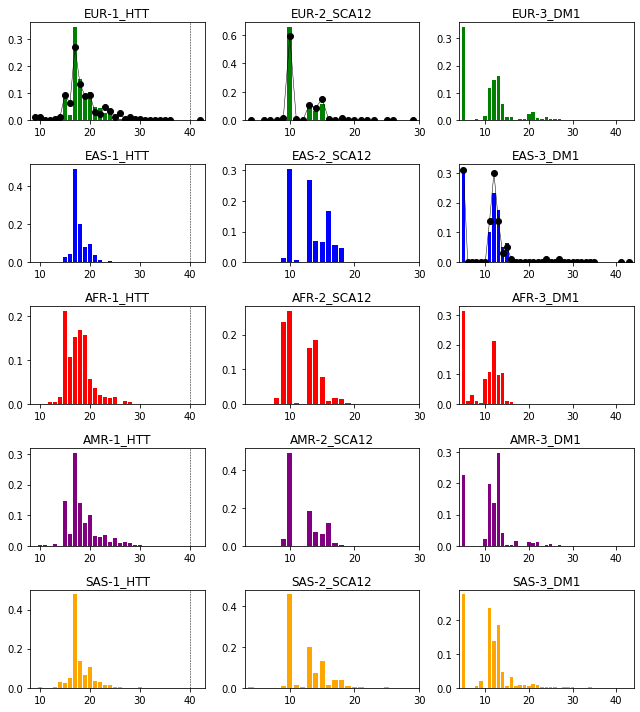

In [3]:
locids = {}
locids["chr4:3074877"] = "1_HTT"
locids["chr5:146878728"] = "2_SCA12"
locids["chr19:45770205"] = "3_DM1"

# Allele freqs compared to known
known_freqs = pd.read_csv(os.path.join(OUTDIR, "known_afreqs.txt"), sep="\t")
called_freqs = pd.read_csv(os.path.join(OUTDIR, "called_afreqs.txt"), sep="\t") # TODO order based on iD
called_freqs = called_freqs[called_freqs["pos"] != 146878729] # need to remove this one
called_freqs["id"] = called_freqs.apply(lambda x: locids["%s:%s"%(x["chrom"], x["pos"])], 1)
called_freqs = called_freqs.sort_values("id")

superpops = ["EUR","EAS","AFR","AMR","SAS"]

num_loci = called_freqs.shape[0] # =numcols
num_pops = len(superpops) # superpops=numrows

fig, axis_array = plt.subplots(num_pops, num_loci, figsize=(num_loci*3, num_pops*2))

plotnum = 0
for i in range(called_freqs.shape[0]):
    chrom = called_freqs["chrom"].values[i]
    pos = called_freqs["pos"].values[i]
    locus_id = called_freqs["id"].values[i]
    
    # Load called freqs
    alleles = set()
    popcounts = {}
    for sp in superpops:
        spcts = {}
        ctstring = called_freqs["freq_%s"%sp].values[i]
        for allele in ctstring.split(","):
            al, fq = allele.split(":")
            al = int(len(al)/len(get_motif(al))); fq = float(fq)
            spcts[al] = fq
        for a in spcts.keys(): alleles.add(a)
        popcounts[sp] = spcts
    alleles = sorted(list(alleles))
    
    # Load known freqs
    k = known_freqs[(known_freqs["chrom"]==chrom) & (known_freqs["pos"]==pos)]
    kcounts = {"thresh": -1}
    if k.shape[0] == 1:
        kcounts["thresh"] = k["thresh"].values[0]
        for sp in superpops:
            spcts = {}
            cstring = k["freq_%s"%sp].values[0]
            if str(cstring) == "nan": continue
            for allele in cstring.split(","):
                al, fq = allele.split(":")
                al = int(float(al)); fq = float(fq)
                spcts[al] = fq
            kcounts[sp] = spcts
            print(kcounts)
    
    for j in range(len(superpops)):
        ax = axis_array[j, i]
        ax.bar(alleles, [popcounts[superpops[j]].get(a, 0) for a in alleles], color=popcolors[superpops[j]])
        
        # Plot known
        if superpops[j] in kcounts.keys():
            ax.plot(alleles, [kcounts[superpops[j]].get(a, 0) for a in alleles], color="black",
                   marker="o", linewidth=0.5)
        
        # Plot threshold
        if kcounts["thresh"]>-1:
            ax.axvline(x=kcounts["thresh"], linewidth=0.5, color="black", linestyle="dashed")
        ax.set_xlim(left=min(alleles)-1, right=max(alleles)+1)
        ax.set_title("%s-%s"%(superpops[j], locus_id))
        #ax.grid(True)
        plotnum += 1

fig.tight_layout()

In [14]:
[popcounts[superpops[j]].get(a, 0) for a in alleles]

[0.275,
 0,
 0,
 0.005,
 0.02,
 0.0,
 0.236,
 0.137,
 0.184,
 0.048,
 0.005,
 0.031,
 0.005,
 0.009,
 0.007,
 0.004,
 0.01,
 0.007,
 0.002,
 0.003,
 0.003,
 0.001,
 0.0,
 0.001,
 0.002,
 0.002,
 0.0,
 0,
 0.0,
 0.001,
 0,
 0,
 0]

In [15]:
alleles

[15,
 18,
 21,
 24,
 27,
 30,
 33,
 36,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 123,
 129]